# Netflix Dataset Analysis 📊

**Prepared By:** Mohammad Tausif  
**Internship ID:** INTERNSHIP_17546440516895be537820f  <!-- replace with your real ID -->  
**Student ID:** APPLY_1755017793689b72419707f    <!-- replace with your real ID -->  

---

## 📌 Introduction
This project is based on the **Netflix Dataset**, which contains information about Movies and TV Shows available on the platform.  
The dataset has around **7,789 records and 11 columns**, including attributes like title, director, cast, country, date added, release year, rating, duration, and listed genres.

## 🎯 Problem Statement
Netflix is one of the world’s largest streaming platforms. With growing competition, Netflix needs to analyze its content library to understand **content trends** (Movies vs TV Shows, genres, and country contributions) and make **strategic recommendations**.  

---

## 🔑 Objectives
1. Analyze the distribution of Movies vs. TV Shows over the years.  
2. Identify the most common genres and how their popularity has changed.  
3. Compare country-wise contributions to Netflix’s catalog.  

---

## ✅ Expected Outcomes
- Insights into how Netflix’s content strategy has evolved.  
- Identification of top-performing genres and categories.  
- Strategic recommendations for future content focus.  

---


## **Setup Environment**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set(style="whitegrid", palette="pastel")

# **Load Dataset**

In [3]:
df = pd.read_excel("Netflix Dataset (4).csv.xlsx")

In [4]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,0.03,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19:00,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# **Data Preprocessing**

In [5]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

Shape: (7789, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None


In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [37]:

print("\nMissing values (%):")
print((df.isnull().mean() * 100).round(2))


Missing values (%):
show_id         0.00
category        0.00
title           0.00
director        0.00
cast            0.00
country         6.51
release_date    1.26
rating          0.09
duration        0.00
type            0.00
description     0.00
year_added      1.26
dtype: float64


In [39]:

df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")

In [38]:

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [14]:
df['year_added'] = df['release_date'].dt.year

# **Preview cleaned data**

In [15]:
df.head()

,show_id,category,title,director,cast,country,release_date,rating,duration,type,description,year_added
0,s1,TV Show,0.03,Unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,07:19:00,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0


# **Exploratory Data Analysis (EDA)**

## **Analyze the distribution of Movies vs. TV Shows over the years**

/tmp/ipython-input-1339030697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette="muted")


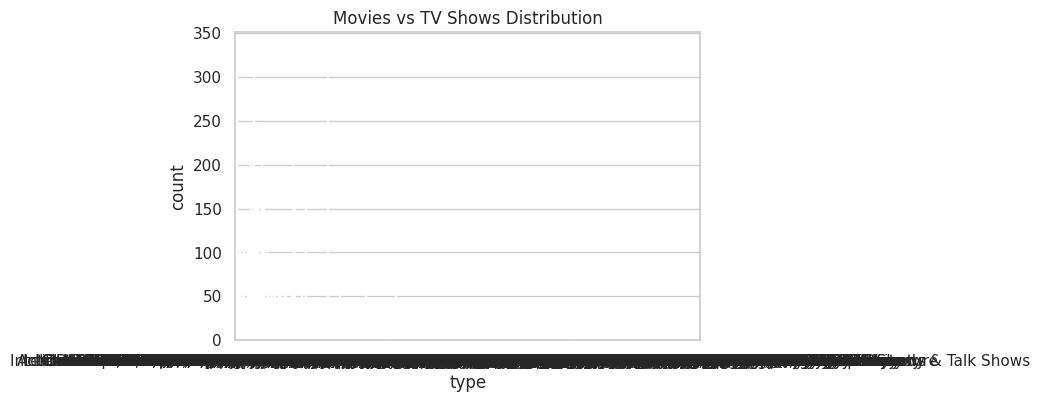

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette="muted")
plt.title("Movies vs TV Shows Distribution")
plt.show()

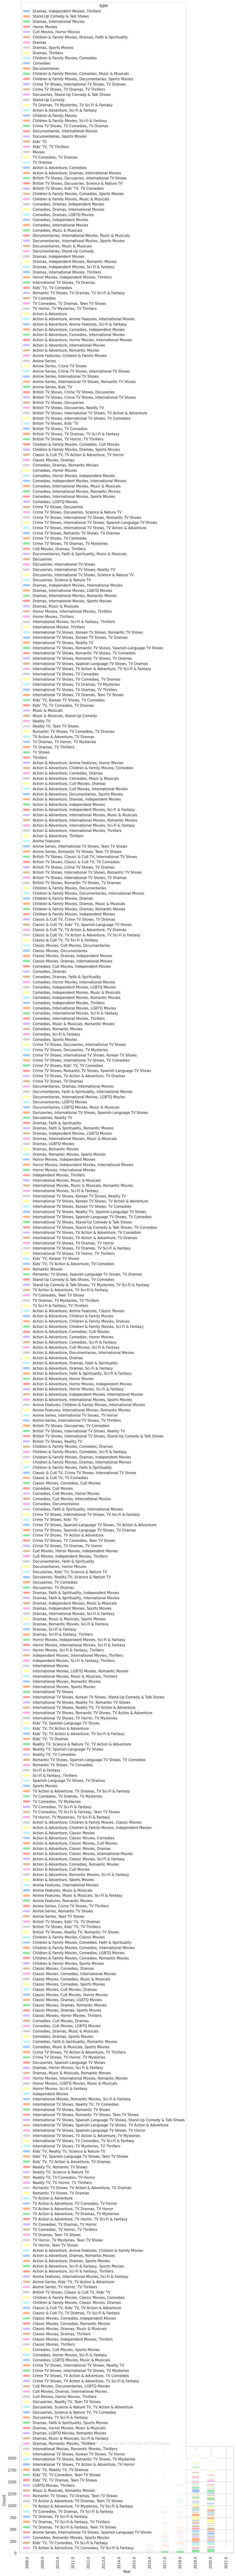

In [17]:
yearly_counts = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
yearly_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Content Added by Year (Movies vs TV Shows)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


## **Identify the most common genres and their popularity changes**

/tmp/ipython-input-2602323193.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, y='Genre', x='Count', palette="coolwarm")


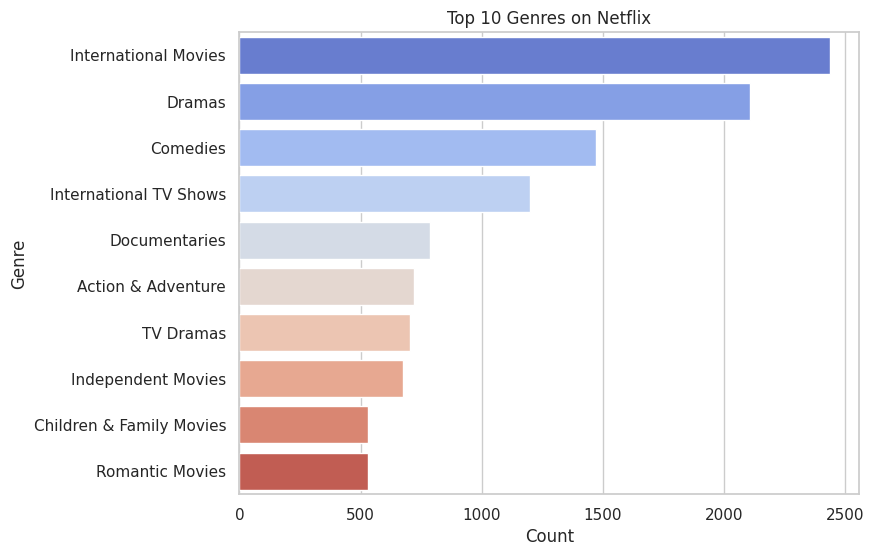

In [19]:
from collections import Counter

all_genres = ",".join(df['type'].dropna()).split(",")
genre_counts = Counter([g.strip() for g in all_genres])

top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(8,6))
sns.barplot(data=top_genres, y='Genre', x='Count', palette="coolwarm")
plt.title("Top 10 Genres on Netflix")
plt.show()

## **Compare country-wise contributions to Netflix’s catalog**

/tmp/ipython-input-170391731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, y='Country', x='Count', palette="viridis")


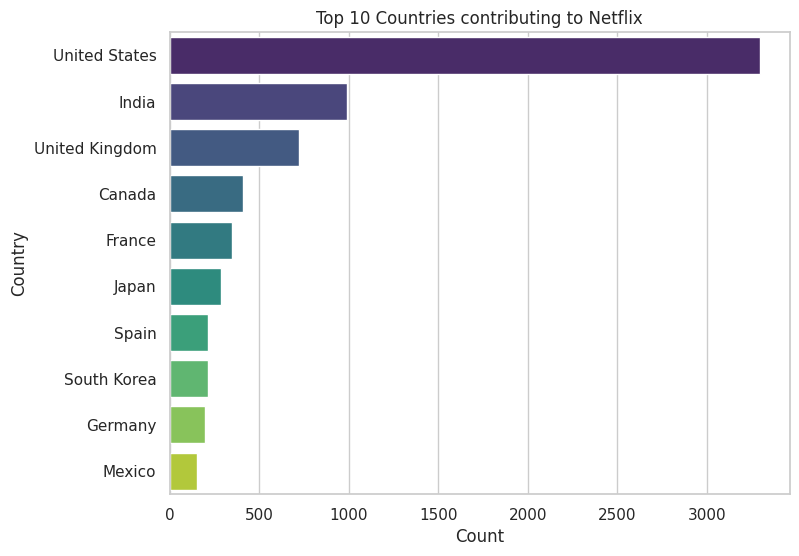

In [20]:
all_countries = ",".join(df['country'].dropna()).split(",")
country_counts = Counter([c.strip() for c in all_countries])
top_countries = pd.DataFrame(country_counts.most_common(10), columns=['Country','Count'])

plt.figure(figsize=(8,6))
sns.barplot(data=top_countries, y='Country', x='Count', palette="viridis")
plt.title("Top 10 Countries contributing to Netflix")
plt.show()

## **Filtering Examples**

### Filter only Movies

In [26]:
movies = df[df['type'] == 'Movie']

### Filter only TV Shows

In [27]:
tv_shows = df[df['type'] == 'TV Show']

### Filter by specific year

In [28]:
movies_2020 = df[(df['type'] == 'Movie') & (df['year_added'] == 2020)]

### Filter by genre (e.g., 'Comedies')

In [30]:
comedies = df[df['type'].str.contains("Comedies", na=False)]

### **Results**

In [36]:
print("Movies only:", movies.shape)
print("TV Shows only:", tv_shows.shape)
print("Movies added in 2020:", movies_2020.shape)
print("Comedies:", comedies.shape)


Movies only: (0, 12)
TV Shows only: (0, 12)
Movies added in 2020: (0, 12)
Comedies: (1997, 12)
